Epoch 0, Loss: 448.7384
Epoch 10, Loss: 4.2040
Epoch 20, Loss: 3.1558
Epoch 30, Loss: 2.4566
Epoch 40, Loss: 1.9886
Epoch 50, Loss: 1.6754
Epoch 60, Loss: 1.4657
Epoch 70, Loss: 1.3254
Epoch 80, Loss: 1.2314
Epoch 90, Loss: 1.1686


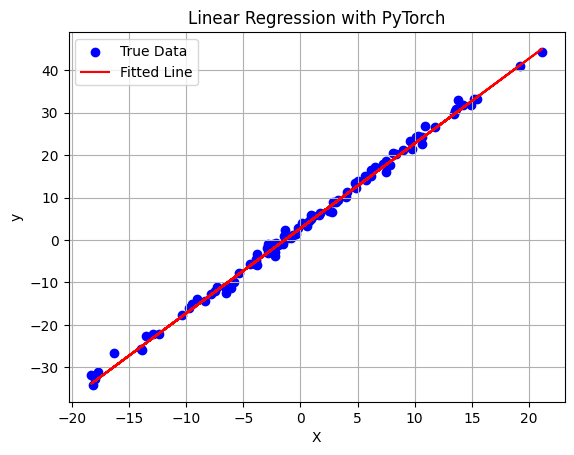

In [3]:
# 📌 Linear Regression using PyTorch
# -----------------------------------
# This script shows how to use PyTorch to fit a straight line to synthetic data using Linear Regression.

import torch                      # PyTorch for tensors and autograd
import torch.nn as nn             # For building neural network models
import matplotlib.pyplot as plt   # For plotting data and model output

# 🔹 Step 1: Generate synthetic data
# -----------------------------------
# We'll simulate 100 data points (x, y) such that y ≈ 2x + 3 with some random noise

X = torch.randn(100, 1) * 10         # Random x values from normal distribution, scaled by 10
y = 2 * X + 3 + torch.randn(100, 1)  # Corresponding y values with added noise

# 🔹 Step 2: Define a simple linear model
# ---------------------------------------
# The model is a single linear layer with 1 input feature and 1 output

model = nn.Linear(in_features=1, out_features=1)  # y = w*x + b

# 🔹 Step 3: Define loss function and optimizer
# ---------------------------------------------
# We'll use Mean Squared Error (MSE) as the loss function, and Stochastic Gradient Descent (SGD) to optimize it

loss_fn = nn.MSELoss()                          # Loss function: Mean Squared Error
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # SGD optimizer with learning rate 0.01

# 🔹 Step 4: Train the model
# ---------------------------
# We'll run 100 training iterations (epochs)

epochs = 100
for epoch in range(epochs):
    model.train()                        # Set model to training mode

    y_pred = model(X)                    # Step 1: Forward pass - predict y from X
    loss = loss_fn(y_pred, y)            # Step 2: Calculate loss between prediction and actual

    optimizer.zero_grad()                # Step 3: Clear previous gradients
    loss.backward()                      # Step 4: Backpropagation - compute new gradients
    optimizer.step()                     # Step 5: Update model weights

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")  # Print loss every 10 epochs

# 🔹 Step 5: Visualize the result
# -------------------------------
# After training, we'll plot the data points and the learned line

# Detach predictions from computational graph for plotting
predicted = model(X).detach()

# Plot original data
plt.scatter(X, y, label="True Data", color='blue')

# Plot the learned regression line
plt.plot(X, predicted, color='red', label="Fitted Line")

plt.legend()
plt.title("Linear Regression with PyTorch")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()
